In [238]:
import pandas as pd
import numpy as np
import math
from datetime import datetime
import matplotlib.pyplot as plt

# Retriving Dataset

## US State Level data

In [241]:
US_State = pd.DataFrame()
for month in range(1,5):
    for day in range(1,31):
        month = str(month).zfill(2)
        day = str(day).zfill(2)
        try:
            US_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/' + month + '-' + day +'-2020.csv'
            df_bin = pd.read_csv(US_url)
            df_bin['Date'] = '2020-'+month+'-'+day
            US_State = pd.concat([US_State, df_bin], ignore_index = True)
        except:
            continue

/Users/lush/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # Remove the CWD from sys.path while we load stuff.


In [242]:
US_State_copy = US_State.copy()
US_State[(US_State['Country/Region'] == 'China') | (US_State['Country_Region'] == 'China') \
             |(US_State['Country/Region'] == 'Mainland China') | (US_State['Country_Region'] == 'Mainland China')].head(3)


,Active,Admin2,Combined_Key,Confirmed,Country/Region,Country_Region,Date,Deaths,FIPS,Last Update,Last_Update,Lat,Latitude,Long_,Longitude,Province/State,Province_State,Recovered
0,NaN,NaN,NaN,1.0,Mainland China,NaN,2020-01-22,NaN,NaN,1/22/2020 17:00,NaN,NaN,NaN,NaN,NaN,Anhui,NaN,NaN
1,NaN,NaN,NaN,14.0,Mainland China,NaN,2020-01-22,NaN,NaN,1/22/2020 17:00,NaN,NaN,NaN,NaN,NaN,Beijing,NaN,NaN
2,NaN,NaN,NaN,6.0,Mainland China,NaN,2020-01-22,NaN,NaN,1/22/2020 17:00,NaN,NaN,NaN,NaN,NaN,Chongqing,NaN,NaN


In [243]:
US_State[(US_State['Country/Region'] == 'China') | (US_State['Country_Region'] == 'China') \
             |(US_State['Country/Region'] == 'Mainland China') | (US_State['Country_Region'] == 'Mainland China')].head(3)


,Active,Admin2,Combined_Key,Confirmed,Country/Region,Country_Region,Date,Deaths,FIPS,Last Update,Last_Update,Lat,Latitude,Long_,Longitude,Province/State,Province_State,Recovered
0,NaN,NaN,NaN,1.0,Mainland China,NaN,2020-01-22,NaN,NaN,1/22/2020 17:00,NaN,NaN,NaN,NaN,NaN,Anhui,NaN,NaN
1,NaN,NaN,NaN,14.0,Mainland China,NaN,2020-01-22,NaN,NaN,1/22/2020 17:00,NaN,NaN,NaN,NaN,NaN,Beijing,NaN,NaN
2,NaN,NaN,NaN,6.0,Mainland China,NaN,2020-01-22,NaN,NaN,1/22/2020 17:00,NaN,NaN,NaN,NaN,NaN,Chongqing,NaN,NaN


In [244]:
US_State_copy = US_State_copy[(US_State_copy['Country/Region'] == 'US') | (US_State_copy['Country_Region'] == 'US')]
US_State_copy = US_State_copy.reset_index(drop = True)
China_Province_copy = US_State[(US_State['Country/Region'] == 'China') | (US_State['Country_Region'] == 'China') \
             |(US_State['Country/Region'] == 'Mainland China') | (US_State['Country_Region'] == 'Mainland China')]

China_Province_copy = China_Province_copy.reset_index(drop = True)


# Data Cleaning

In [245]:
US_State_copy = US_State_copy.drop(['Active','Admin2','Combined_Key','FIPS'],1)
China_Province_copy = China_Province_copy.drop(['Active','Admin2','Combined_Key','FIPS'],1)

## Time

In [246]:
# Function for stripping column Last Update
def strip_specific_time_1(date_column):
    for date in range(len(date_column)):
        if type(date_column[date]) == str:
            if len(date_column[date]) == 19:
                dt = str(date_column[date]).split('T')[0]
                date_column[date] = dt
            elif str(date_column[date]).split(' ')[0].split('/')[2] == '2020':
                dt = str(date_column[date]).split(' ')[0].split('/')
                date_column[date] = str(dt[2])+'-'+str(dt[0].zfill(2))+'-'+str(dt[1].zfill(2))
            else:
                dt = str(date_column[date]).split(' ')[0].split('/')
                date_column[date] = str(dt[2])+'20-'+str(dt[0].zfill(2))+'-'+str(dt[1].zfill(2))
        else:
            continue 

In [247]:
# Function for stripping column Last_Update
def strip_specific_time_2(date_column):
    for date in range(len(date_column)):
        if type(date_column[date]) == str:
            try: 
                dt = datetime.strptime(str(date_column[date]), '%Y-%m-%d %H:%M:%S')
                date_column[date] = str(dt.year)+'-'+str(dt.month).zfill(2)+'-'+str(dt.day).zfill(2)
            except:
                dt = str(date_column[date]).split(' ')[0].split('/')
                date_column[date] = str(dt[2])+'20-'+str(dt[0].zfill(2))+'-'+str(dt[1].zfill(2))
        else:
            continue

In [248]:
# Function for combining two columns
def combine_two_columns(df,column1,column2):
    for row_index in range(len(df[column1])):
        if pd.Series(df[column1][row_index]).isnull()[0]:
            df[column1][row_index] = df[column2][row_index]
    df.drop(column2, axis = 1, inplace = True)
    return df

In [249]:
# Combine the Date Columns
strip_specific_time_2(US_State_copy['Last_Update'])
strip_specific_time_1(US_State_copy['Last Update'])
US_State_copy = combine_two_columns(US_State_copy,"Last_Update","Last Update")

strip_specific_time_2(China_Province_copy['Last_Update'])
strip_specific_time_1(China_Province_copy['Last Update'])
China_Province_copy = combine_two_columns(China_Province_copy,"Last_Update","Last Update")



/Users/lush/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/lush/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/lush/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  de

In [250]:
US_State_copy = US_State_copy[US_State_copy['Last_Update'].isnull() == False]
US_State_copy = US_State_copy.reset_index(drop = True)

China_Province_copy = China_Province_copy[China_Province_copy['Last_Update'].isnull() == False]
China_Province_copy = China_Province_copy.reset_index(drop = True)


## Country/Region, Province/State, Latitude, Longitude

In [251]:
US_State_copy = combine_two_columns(US_State_copy,"Country_Region","Country/Region")

China_Province_copy = combine_two_columns(China_Province_copy,"Country_Region","Country/Region")



/Users/lush/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [252]:
# The rest nulls are data for one country, so don't have province/state
US_State_copy[US_State_copy['Province_State'].isnull()]

,Confirmed,Country_Region,Date,Deaths,Last_Update,Lat,Latitude,Long_,Longitude,Province/State,Province_State,Recovered
0,1.0,US,2020-01-22,NaN,2020-01-22,NaN,NaN,NaN,NaN,Washington,NaN,NaN
1,1.0,US,2020-01-23,NaN,2020-01-23,NaN,NaN,NaN,NaN,Washington,NaN,NaN
2,1.0,US,2020-01-24,NaN,2020-01-24,NaN,NaN,NaN,NaN,Washington,NaN,NaN
3,1.0,US,2020-01-24,NaN,2020-01-24,NaN,NaN,NaN,NaN,Chicago,NaN,NaN
4,1.0,US,2020-01-25,NaN,2020-01-25,NaN,NaN,NaN,NaN,Washington,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1551,15.0,US,2020-03-21,0.0,2020-03-21,NaN,13.4443,NaN,144.7937,Guam,NaN,0.0
1552,14.0,US,2020-03-21,1.0,2020-03-20,NaN,44.2998,NaN,-99.4388,South Dakota,NaN,0.0
1553,8.0,US,2020-03-21,0.0,2020-03-21,NaN,38.4912,NaN,-80.9545,West Virginia,NaN,0.0
1554,6.0,US,2020-03-21,0.0,2020-03-21,NaN,18.3358,NaN,-64.8963,United States Virgin Islands,NaN,0.0


In [253]:
def combine_same_columns(col1, col2):
    for i in range(len(col1)):
        if type(col1[i]) == str:
            col2[i] = col1[i]

In [254]:
combine_same_columns(US_State_copy['Province/State'],US_State_copy['Province_State'])
combine_same_columns(US_State_copy['Lat'],US_State_copy['Latitude'])
combine_same_columns(US_State_copy['Long_'],US_State_copy['Longitude'])

combine_same_columns(China_Province_copy['Province/State'],China_Province_copy['Province_State'])
combine_same_columns(China_Province_copy['Lat'],China_Province_copy['Latitude'])
combine_same_columns(China_Province_copy['Long_'],China_Province_copy['Longitude'])

/Users/lush/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [255]:
# Since we don't need Latitude and Longitude in this analysis, we directly delete these two columns
US_State_copy = US_State_copy.drop(['Province/State','Lat','Long_','Latitude','Longitude'], 1)

China_Province_copy = China_Province_copy.drop(['Province/State','Lat','Long_','Latitude','Longitude'], 1)


In [256]:
US_State_copy = US_State_copy[US_State_copy['Country_Region'].isnull() == False]

China_Province_copy = China_Province_copy[China_Province_copy['Country_Region'].isnull() == False]


In [257]:
# Now all Nan we have is for Deaths and recovered, so we can fill using 0
US_State_copy = US_State_copy.fillna(0)
China_Province_copy = China_Province_copy.fillna(0)

In [258]:
US_State_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63264 entries, 0 to 63263
Data columns (total 7 columns):
Confirmed         63264 non-null float64
Country_Region    63264 non-null object
Date              63264 non-null object
Deaths            63264 non-null float64
Last_Update       63264 non-null object
Province_State    63264 non-null object
Recovered         63264 non-null float64
dtypes: float64(3), object(4)
memory usage: 3.9+ MB


In [259]:
China_Province_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2575 entries, 0 to 2574
Data columns (total 7 columns):
Confirmed         2575 non-null float64
Country_Region    2575 non-null object
Date              2575 non-null object
Deaths            2575 non-null float64
Last_Update       2575 non-null object
Province_State    2575 non-null object
Recovered         2575 non-null float64
dtypes: float64(3), object(4)
memory usage: 160.9+ KB


In [260]:
US_State_copy.head(3)

,Confirmed,Country_Region,Date,Deaths,Last_Update,Province_State,Recovered
0,1.0,US,2020-01-22,0.0,2020-01-22,Washington,0.0
1,1.0,US,2020-01-23,0.0,2020-01-23,Washington,0.0
2,1.0,US,2020-01-24,0.0,2020-01-24,Washington,0.0


In [261]:
# Extract the confirmed, deaths and recovered cases
dates = df_confirmed.columns.values.tolist()[4:]
df_confirmed = pd.melt(df_confirmed, id_vars=['Province/State','Country/Region','Lat','Long'], value_vars= dates)
df_deaths = pd.melt(df_deaths, id_vars=['Province/State','Country/Region','Lat','Long'], value_vars= dates)
df_recovered = pd.melt(df_recovered, id_vars=['Province/State','Country/Region','Lat','Long'], value_vars= dates)


In [262]:
# Rename the Columns
df_confirmed = df_confirmed.rename(columns={'Country/Region':'Country_Region','Province/State':'Province_State','variable': 'Date','value':'Confirmed'})
df_deaths = df_deaths.rename(columns={'Country/Region':'Country_Region','Province/State':'Province_State','variable': 'Date','value':'Deaths'})
df_recovered = df_recovered.rename(columns={'Country/Region':'Country_Region','Province/State':'Province_State','variable': 'Date','value':'Recovered'})


In [263]:
# Get the information for US
df_US_confirmed = df_confirmed[df_confirmed["Country_Region"] == "US"].iloc[:,-2:]
df_US_deaths = df_deaths[df_deaths["Country_Region"] == "US"].iloc[:,-2:]
df_US_recovered = df_recovered[df_recovered["Country_Region"] == "US"].iloc[:,-2:]

# State_Province-level Analysis

In [264]:
# Get data for Hubei Province
Hubei = China_Province_copy[China_Province_copy["Province_State"] == "Hubei"]
Hubei.head(10)

,Confirmed,Country_Region,Date,Deaths,Last_Update,Province_State,Recovered
12,444.0,Mainland China,2020-01-22,17.0,2020-01-22,Hubei,28.0
43,444.0,Mainland China,2020-01-23,17.0,2020-01-23,Hubei,28.0
62,549.0,Mainland China,2020-01-24,24.0,2020-01-24,Hubei,31.0
92,761.0,Mainland China,2020-01-25,40.0,2020-01-25,Hubei,32.0
122,1058.0,Mainland China,2020-01-26,52.0,2020-01-26,Hubei,42.0
152,1423.0,Mainland China,2020-01-27,76.0,2020-01-27,Hubei,45.0
182,3554.0,Mainland China,2020-01-28,125.0,2020-01-28,Hubei,80.0
212,3554.0,Mainland China,2020-01-29,125.0,2020-01-29,Hubei,88.0
242,4903.0,Mainland China,2020-01-30,162.0,2020-01-30,Hubei,90.0
273,7153.0,Mainland China,2020-02-01,249.0,2020-02-01,Hubei,168.0


In [265]:
# Get data for NY State
US_State_copy[(US_State_copy["Date"] == "2020-03-11")&((US_State_copy["Province_State"]=="New York")| (US_State_copy["Province_State"].str.endswith("NY")))]


,Confirmed,Country_Region,Date,Deaths,Last_Update,Province_State,Recovered
948,220.0,US,2020-03-11,0.0,2020-03-11,New York,0.0


In [266]:
US_State_sum = US_State_copy.groupby(["Date","Province_State"]).sum()
US_State_sum = US_State_sum.reset_index()

In [279]:
# Define function to get the Incremental ratio
def get_ratio(series_input): 
    data = np.array([0])  
    new_row = pd.Series(data)  
    numerator = series_input.diff()
    denominator = pd.concat([new_row, series_input[:]]).reset_index(drop = True).iloc[:-1]
    return numerator/denominator


In [293]:
# Define a function to get the state data with given state name and state short name
def get_state_data(df_all,state_name,state_short_name):
    df_state = df_all[(df_all["Province_State"].str.startswith(state_name))|(df_all["Province_State"].str.endswith(state_short_name))]
    df_state.drop("Last_Update",axis=1,inplace=True)
    df_state.drop_duplicates(inplace=True)
    df_state_sum = df_state.groupby("Date").sum().sort_values("Date").reset_index()
    # Add the number of new cases for each day
    df_state_sum.loc[:,"Confirmed_new"] = df_state_sum.loc[:,"Confirmed"].diff()
    df_state_sum.loc[:,"Deaths_new"] = df_state_sum.loc[:,"Deaths"].diff()
    df_state_sum.loc[:,"Recovered_new"] = df_state_sum.loc[:,"Recovered"].diff()
    # Add the Incremental ratio for new cases for each day
    for i in ["Confirmed","Deaths","Recovered"]:
        data = np.array([0])  
        new_row = pd.Series(data)
        numerator = df_state_sum[i].diff()
        denominator = pd.concat([new_row, df_state_sum[i][:]]).reset_index(drop = True).iloc[:-1]
        column_name = i + "_Incremental_Rate"
        df_state_sum.loc[:,column_name] = numerator/denominator
    df_state_sum["State"] = state_name
    return df_state_sum
    
    
    

In [296]:
US_NY_sum = get_state_data(US_State_copy,"New York","NY")

US_WA_sum = get_state_data(US_State_copy,"Washington","WA")

US_CA_sum = get_state_data(US_State_copy,"California","CA")

US_MI_sum = get_state_data(US_State_copy,"Michigan","MI")

US_CO_sum = get_state_data(US_State_copy,"Colorado","CO")

US_FL_sum = get_state_data(US_State_copy,"Florida","FL")

US_IL_sum = get_state_data(US_State_copy,"Illinois","IL")

US_KS_sum = get_state_data(US_State_copy,"Kansas","KS")

US_MA_sum = get_state_data(US_State_copy,"Massachusetts","MA")

US_NV_sum = get_state_data(US_State_copy,"Nevada","NV")

US_NJ_sum = get_state_data(US_State_copy,"New Jersey","NJ")

US_TX_sum = get_state_data(US_State_copy,"Texas","TX")

State_combine = pd.concat([US_NY_sum,US_WA_sum,US_CA_sum,US_MI_sum,US_CO_sum,US_FL_sum,US_IL_sum,US_KS_sum \
        ,US_MA_sum,US_NV_sum,US_NJ_sum,US_TX_sum])


/Users/lush/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [298]:
State_combine.to_csv("State Data.csv")

In [302]:
all_state_name = pd.read_csv("state_name_list.csv")

In [303]:
all_state_name.head(3)

,state_name,state_short_name
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ


In [305]:
for i in range(len(all_state)):
    if i ==0:
        df_all_state = get_state_data(US_State_copy,all_state_name["state_name"][i],all_state_name["state_short_name"][i])
    else:
        df_all_state = pd.concat([df_all_state,get_state_data(US_State_copy,all_state_name["state_name"][i],all_state_name["state_short_name"][i])])


/Users/lush/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [309]:
df_all_state.to_csv("all_state_data.csv")

In [274]:
Hubei.drop(["Country_Region","Last_Update"], axis=1,inplace = True)
# Add the number of new cases for each day
Hubei.loc[:,"Confirmed_new"] = Hubei.loc[:,"Confirmed"].diff()
Hubei.loc[:,"Deaths_new"] = Hubei.loc[:,"Deaths"].diff()
Hubei.loc[:,"Recovered_new"] = Hubei.loc[:,"Recovered"].diff()

# Add the Incremental ratio for new cases for each day
Hubei.loc[:,"Confirmed_Incremental_Rate"] = get_ratio(Hubei["Confirmed"])
Hubei.loc[:,"Deaths_Incremental_Rate"] = get_ratio(Hubei["Deaths"])
Hubei.loc[:,"Recovered_Incremental_Rate"] = get_ratio(Hubei["Recovered"])

/Users/lush/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/lush/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [194]:
Hubei = Hubei.reset_index().drop("index",axis=1)

In [195]:
# Define a function to get the date that there are more than 100 confirmed cases
def more_than_100(df,date_column,case_column):
    first_date = df[date_column][0]
    for i in range(len(df)):
        if df[case_column][i] < 100:
            first_date = df[date_column][i]
        elif df[case_column][i] > 100:
            break
    df_more_than_100 = df[(df[date_column] > first_date)]
    print(first_date)
    return df_more_than_100



In [196]:
NY_greater_100 = more_than_100(US_NY_sum,"Date","Confirmed_new")
Hubei_greater_100 = more_than_100(Hubei,"Date","Confirmed_new")


2020-03-11
2020-01-23


In [197]:
NY_greater_100 = NY_greater_100.reset_index().drop("index",axis=1)

## Visualization for CA and NY

(-10000, 200000)

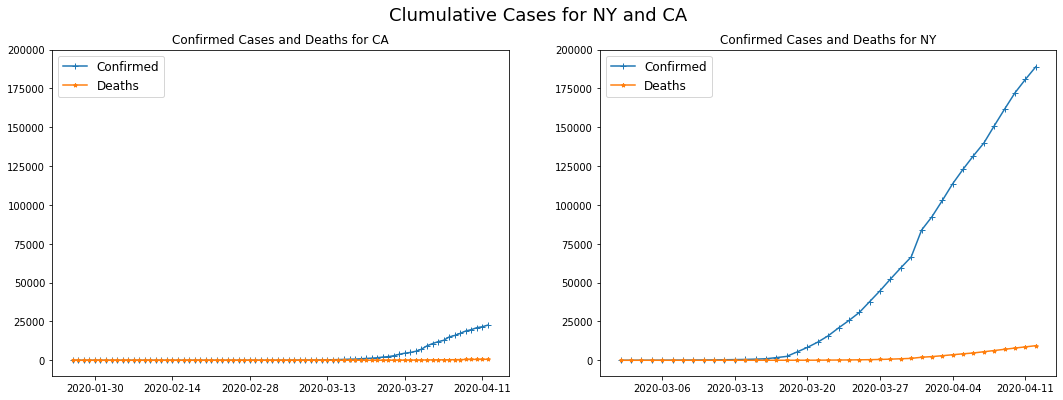

In [217]:
fig, axs = plt.subplots(1, 2,figsize=(18,6))
fig.suptitle('Clumulative Cases for NY and CA',fontsize = 18)
viz_x_inverval = int(len(US_CA_sum["Date"])/5)
viz_x_date_pos = [i*(viz_x_inverval-1)+4 for i in range(6)]
axs[0].title.set_text('Confirmed Cases and Deaths for CA')
axs[0].set_xticks(viz_x_date_pos)
axs[0].set_xticklabels(US_CA_sum["Date"].iloc[viz_x_date_pos])
axs[0].plot(US_CA_sum["Confirmed"],"-+")
axs[0].plot(US_CA_sum["Deaths"],"-*",markersize  = 4)
axs[0].legend(["Confirmed","Deaths"], loc='upper left',fontsize = 12)
axs[0].set_ylim([-10000,200000])

viz_x_inverval = int(len(US_NY_sum["Date"])/5)
viz_x_date_pos = [i*(viz_x_inverval-1)+4 for i in range(6)]
axs[1].title.set_text('Confirmed Cases and Deaths for NY')
axs[1].set_xticks(viz_x_date_pos)
axs[1].set_xticklabels(US_NY_sum["Date"].iloc[viz_x_date_pos])
axs[1].plot(US_NY_sum["Confirmed"],"-+")
axs[1].plot(US_NY_sum["Deaths"],"-*",markersize  = 4)
axs[1].legend(["Confirmed","Deaths"], loc='upper left',fontsize = 12)
axs[1].set_ylim([-10000,200000])


(-1000, 20000)

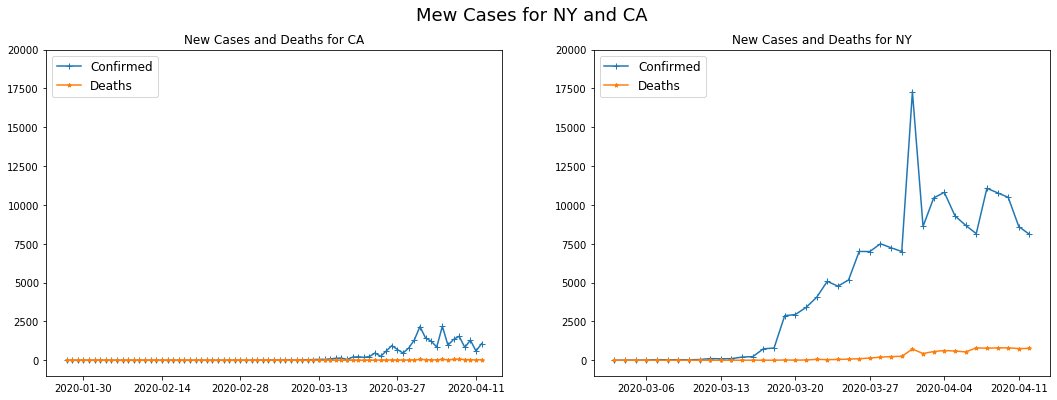

In [237]:
fig, axs = plt.subplots(1, 2,figsize=(18,6))
fig.suptitle('Mew Cases for NY and CA',fontsize = 18)
viz_x_inverval = int(len(US_CA_sum["Date"])/5)
viz_x_date_pos = [i*(viz_x_inverval-1)+4 for i in range(6)]

axs[0].set_xticks(viz_x_date_pos)
axs[0].set_xticklabels(US_CA_sum["Date"].iloc[viz_x_date_pos])
axs[0].title.set_text('New Cases and Deaths for CA')
axs[0].plot(US_CA_sum["Confirmed_new"],"-+")
axs[0].plot(US_CA_sum["Deaths_new"],"-*",markersize  = 4)
axs[0].legend(["Confirmed","Deaths"], loc='upper left',fontsize = 12)
axs[0].set_ylim([-1000,20000])

viz_x_inverval = int(len(US_NY_sum["Date"])/5)
viz_x_date_pos = [i*(viz_x_inverval-1)+4 for i in range(6)]
axs[1].set_xticks(viz_x_date_pos)
axs[1].set_xticklabels(US_NY_sum["Date"].iloc[viz_x_date_pos])
axs[1].title.set_text('New Cases and Deaths for NY')
axs[1].plot(US_NY_sum["Confirmed_new"],"-+")
axs[1].plot(US_NY_sum["Deaths_new"],"-*",markersize  = 4)
axs[1].legend(["Confirmed","Deaths"], loc='upper left',fontsize = 12)
axs[1].set_ylim([-1000,20000])


## Visualization for CA

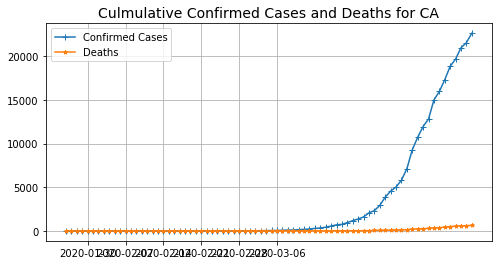

In [219]:
# Culmulative Confirmed Cases and Deaths for CA
plt.figure(figsize=(8,4))
plt.title("Culmulative Confirmed Cases and Deaths for CA",fontsize = 14)
plt.plot(US_CA_sum["Confirmed"],"-+")
plt.plot(US_CA_sum["Deaths"],"-*",markersize  = 4)
plt.xticks(viz_x_date_pos,US_CA_sum["Date"].iloc[viz_x_date_pos])

plt.legend(['Confirmed Cases',"Deaths"], loc='upper left')
plt.grid()

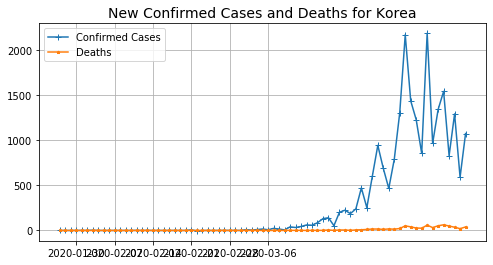

In [220]:
# New Confirmed Cases and Deaths for Korea
plt.figure(figsize=(8,4))
plt.title("New Confirmed Cases and Deaths for Korea",fontsize = 14)
plt.plot(US_CA_sum["Confirmed_new"],"-+")
plt.plot(US_CA_sum["Deaths_new"],"-*",markersize = 3)
plt.xticks(viz_x_date_pos,US_CA_sum["Date"].iloc[viz_x_date_pos])

plt.legend(['Confirmed Cases',"Deaths"], loc='upper left')
plt.grid()

## Visualization for NY

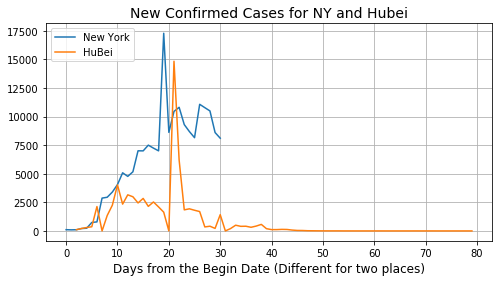

In [221]:
plt.figure(figsize=(8,4))

plt.title("New Confirmed Cases for NY and Hubei",fontsize = 14)
plt.plot(NY_greater_100["Confirmed_new"])
plt.plot(Hubei_greater_100["Confirmed_new"])
plt.xlabel("Days from the Begin Date (Different for two places)",fontsize = 12)
plt.legend(['New York','HuBei'], loc='upper left')
plt.grid()

In [222]:
Hubei[Hubei["Date"]=="2020-02-11"]

,Confirmed,Date,Deaths,Province_State,Recovered,Confirmed_new,Deaths_new,Recovered_new,Confirmed_Incremental_Rate,Deaths_Incremental_Rate,Recovered_Incremental_Rate
19,33366.0,2020-02-11,1068.0,Hubei,2639.0,1638.0,94.0,417.0,NaN,NaN,NaN


In [223]:
Hubei.head(3)

,Confirmed,Date,Deaths,Province_State,Recovered,Confirmed_new,Deaths_new,Recovered_new,Confirmed_Incremental_Rate,Deaths_Incremental_Rate,Recovered_Incremental_Rate
0,444.0,2020-01-22,17.0,Hubei,28.0,NaN,NaN,NaN,NaN,NaN,NaN
1,444.0,2020-01-23,17.0,Hubei,28.0,0.0,0.0,0.0,0.000000,0.000000,0.00000
2,549.0,2020-01-24,24.0,Hubei,31.0,105.0,7.0,3.0,0.001549,0.002215,0.00005


## SIR modeling for fitting COVID-19 Trends

In [230]:
from scipy import optimize
from scipy import integrate

In [233]:
ydata[0]

1.0

/Users/lush/opt/anaconda3/lib/python3.7/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


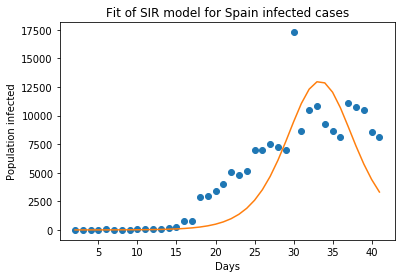

Optimal parameters: beta = 14.745668240814657  and gamma =  14.399168656058325


In [231]:
# Fit from start
population = float(46750238)
SIR_US_df = pd.DataFrame(US_NY_sum["Confirmed_new"])
SIR_US_df['day_count'] = list(range(1,len(SIR_US_df)+1))
SIR_US_df.dropna(inplace = True)
ydata = [i for i in SIR_US_df["Confirmed_new"]]
xdata = SIR_US_df["day_count"]
ydata = np.array(ydata, dtype=float)
xdata = np.array(xdata, dtype=float)

N = population
inf0 = ydata[0]
sus0 = N - inf0
rec0 = 0.0

def sir_model(y, x, beta, gamma):
    sus = -beta * y[0] * y[1] / N
    rec = gamma * y[1]
    inf = -(sus + rec)
    return sus, inf, rec

def fit_odeint(x, beta, gamma):
    return integrate.odeint(sir_model, (sus0, inf0, rec0), x, args=(beta, gamma))[:,1]

popt, pcov = optimize.curve_fit(fit_odeint, xdata, ydata)
fitted = fit_odeint(xdata, *popt)

plt.plot(xdata, ydata, 'o')
plt.plot(xdata, fitted)
plt.title("Fit of SIR model for Spain infected cases")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])